# PJ01 : Choose Your Own Analysis

My question of interest for this project is evaluating whether students from the In-Person or Remote sections attend office hours more on average. My hypothesis is that students from the In-Person class attend office hours more on average because they may prefer to be more actively engaged with the course more than students who chose to attend a more asynchronous section.

The code below will help to automatically reload any changes I make and to save them in modules that I have imported

In [4]:
__author__ = "730236019"

In [5]:
%reload_ext autoreload
%autoreload 2

## Step 1: Setting Up the Data

First, I will need to read the csv survey and convert it into a list of rows. This will help me choose the useful columns for my analysis including the section of students and the amount of office hour visits on average. Next, I will need to convert the table made of lists of rows into a dictionary of columns.

Both of these conversions will allow me to more easily analyze the data through functions which are row-oriented or column-oriented.



In [6]:
from data_utils import read_csv_rows, columnar

data_rows: list[dict[str, str]] = read_csv_rows('../../data/survey.csv')
columns: dict[str, list[str]] = columnar(data_rows)

## Step 2: Selecting from a Data Table

Next, I neeed to determine which two columns will represent the section of students and their respective visits to office hours by printing a dictionary of all columns. 

In [7]:
from data_utils import head

selecting: dict[str, list[str]] = head(columns, 1)

print(selecting)

{'row_number': ['0'], 'year': ['23'], 'unc_status': ['Returning UNC Student'], 'comp_major': ['No'], 'primary_major': ['Advertising and Public Relations'], 'data_science': ['No'], 'prereqs': ['MATH 129P, MATH 130'], 'prior_exp': ['None to less than one month!'], 'AP_Principles': [''], 'AP_A': [''], 'other_comp': [''], 'prior_time': [''], 'languages': [''], 'section': ['In-Person'], 'in_person_classes': [''], 'hours_online_social': ['3 to 5 hours'], 'hours_online_work': ['3 to 5 hours'], 'lesson_time': ['5'], 'sync_perf': ['2'], 'all_sync': ['2'], 'own_notes': ['4'], 'own_examples': ['2'], 'oh_visits': ['2'], 'ls_effective': ['7'], 'lsqs_effective': ['6'], 'programming_effective': ['6'], 'qz_effective': ['5'], 'oh_effective': ['5'], 'tutoring_effective': [''], 'kaki_effective': ['3'], 'pace': ['5'], 'difficulty': ['5'], 'understanding': ['4'], 'interesting': ['5'], 'valuable': ['6'], 'would_recommend': ['7']}


## Step 3: Narrowing Down

Next, I will use the `section` and `oh_visits` columns from above to display a new table only containing the necessary columns. 

Note: I've chosen to disply only a few rows to show that I'm on the right path.

In [8]:
from data_utils import head, select
from tabulate import tabulate

subset: dict[str, list[str]] = select(columns, ["section", "oh_visits"])
headings: dict[str, list[str]] = head(subset, 5)
tabulate(headings, headings.keys(), "html")

section,oh_visits
In-Person,2
In-Person,0
Remote,0
,4
Remote,1


## Step 4: Counting

Next, I will use `count` to determine the total number of students enrolled in the "Remote" and "In-Person" sections. Then, I created `seeker` to determine the number of total office hour visits per assingment in both sections. While these are crucial steps, they are tough to compare since they are not on a per capita basis.

Remote total enrollment: 192 
In-Person total enrollment: 350 
Total average office hour visits per assignment per section: {'Remote': 246, 'In-Person': 454} 


<AxesSubplot:>

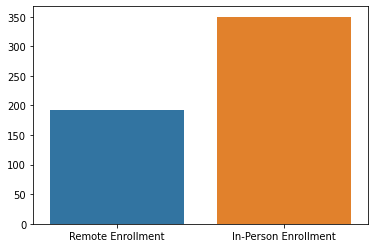

In [9]:
from data_utils import count, seeker
counts = count(subset['section'])

print(f"Remote total enrollment: {counts['Remote']} ")
print(f"In-Person total enrollment: {counts['In-Person']} ")

visit_count: dict[str, int] = seeker(data_rows, "oh_visits", "section", "Remote", "In-Person")

print(f"Total average office hour visits per assignment per section: {visit_count} ")

import seaborn

seaborn.barplot(x=['Remote Enrollment', 'In-Person Enrollment'], y=[counts['Remote'], counts['In-Person']])

## Step 5: Final Comparison on a Per-capita Basis

Last step is to determine the average number of office visits per student per assignment in each class to determine who attends more office hours. This step provides a more accurate per-capita comparison since the Remote section is around half the size of the In-Person section. Additionally, I created a function to round these final proportions. 



In [11]:
from data_utils import calc, rounded, seeker
results: dict[str, float] = seeker(data_rows, "oh_visits", "section", "Remote", "In-Person")
proportions: dict[str, float] = calc(results, "Remote", "In-Person", 192, 350)
rounded(proportions, 2)
#print(f"Final proportion of office hour visits per student in sections: {proportions} ")


{'Remote': 1.28, 'In-Person': 1.3}

# Conclusion

By a slim margin of around .02 visits per person, my hypothesis held true that on average a student within the "In-Person" section attends office hours more than a Remote student. Admittingly, I am surprised at how close the margin is as I generally would expect remote students to be much less engaged with the course. However, it appears it may be poor to judge a section's engagement by evaluating their number of office hour visits as opposed to potentially the sections class attendance and/or grades.

On another note, I am very interested to see the margin between remote and in-person office hour visits from those sections. Would remote individuals want to stay remote with the course or would they want to engage with UTA's since they don't in-class. 